# Task
I want to create a regressor for the column "Females, as a share of private paid employees by occupational group: Managers" based on all the columns except the "Country Name". Remove the "Country Name". Use a filter feature selection prior the regressor. Compare L1 regularized linear regression against random forest.   Use polynomial features of order two  after the feature selection. Use sklearn pipelines.

Here is all the data you need:
"dataset_indicadores_latam_2013_2017_sin_venezuela.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display basic information to verify the loading process.



In [10]:
import pandas as pd

try:
    df = pd.read_csv(r'C:\Users\Soporte-NuCom\Desktop\DOCUMENTOS VARIOS\DRAGON\MATERIAS\FUNDAMENTOS CIENCIA DATOS\WWBI_InclusionFinanciera4\data\DataEngineering_curated\analisis_final\dataset_indicadores_latam_2013_2017_sin_venezuela.csv', encoding='latin-1')
    print(df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: File not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format or encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

(80, 68)


,Country Name,Female to male wage ratio in the private sector (using mean),Female to male wage ratio in the private sector (using median),Female to male wage ratio in the public sector (using mean),Female to male wage ratio in the public sector (using median),"Females, as a share of private paid employees","Females, as a share of private paid employees by occupational group: Clerks","Females, as a share of private paid employees by occupational group: Elementary occupation","Females, as a share of private paid employees by occupational group: Managers","Females, as a share of private paid employees by occupational group: Professionals",...,"Public sector wage premium for females, by industry: Education (compared to paid wage employees)","Public sector wage premium for females, by industry: Health (compared to paid wage employees)","Public sector wage premium for females, by occupation: Medical workers (compared to paid wage employees)","Public sector wage premium for females, by occupation: Teachers (compared to paid wage employees)","Public sector wage premium for males, by industry: Education (compared to paid wage employees)","Public sector wage premium for males, by industry: Health (compared to paid wage employees)","Public sector wage premium for males, by occupation: Medical workers (compared to paid wage employees)","Public sector wage premium for males, by occupation: Teachers (compared to paid wage employees)","Public sector wage premium, by gender: Female (compared to all private employees)","Public sector wage premium, by gender: Male (compared to all private employees)"
0,Argentina,0.675478,0.652174,0.852742,0.833333,0.424759,NaN,0.095658,0.313095,0.437079,...,0.041243,0.040041,-2.149905,-2.149905,-0.144038,0.015900,-2.149905,-2.149905,0.390397,0.017744
1,Bolivia,0.732018,0.686243,0.808738,0.861087,0.307266,0.550602,0.351888,0.358105,0.475550,...,0.169259,0.242015,0.387840,0.334330,0.116933,0.205743,0.367138,0.099831,0.319806,0.095851
2,Brazil,0.741663,0.764864,0.714107,0.729973,0.428903,0.620984,0.010419,0.392691,0.540284,...,0.048058,-0.204508,0.136523,0.069629,-0.116306,-0.223518,0.015326,-0.042621,0.170618,0.189598
3,Chile,0.744976,0.766667,0.807607,0.838680,0.425980,0.627146,0.520020,0.328217,0.499085,...,0.013377,-0.039521,0.021776,-0.005614,-0.220607,-0.056611,0.044908,-0.146293,0.158985,0.072197
4,Colombia,0.876958,0.917658,0.998386,1.023948,0.413730,0.572295,0.090592,0.557941,0.243795,...,0.659146,0.365168,NaN,NaN,0.251482,0.336440,NaN,NaN,0.849002,0.488014


## Data preparation

### Subtask:
Prepare the data for modeling.


**Reasoning**:
Drop the 'Country Name' column, separate the target variable, and handle missing values in the features.



In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Drop the 'Country Name' column
df = df.drop(columns=['Country Name'])

# Identify the target variable
target_column = 'Females, as a share of private paid employees by occupational group: Managers'
y = df[target_column]
X = df.drop(columns=[target_column])

# Handle missing values using mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature engineering

### Subtask:
Apply feature selection and polynomial transformation to the training and testing data.


**Reasoning**:
Apply feature selection using SelectKBest and then apply polynomial transformation to the selected features.



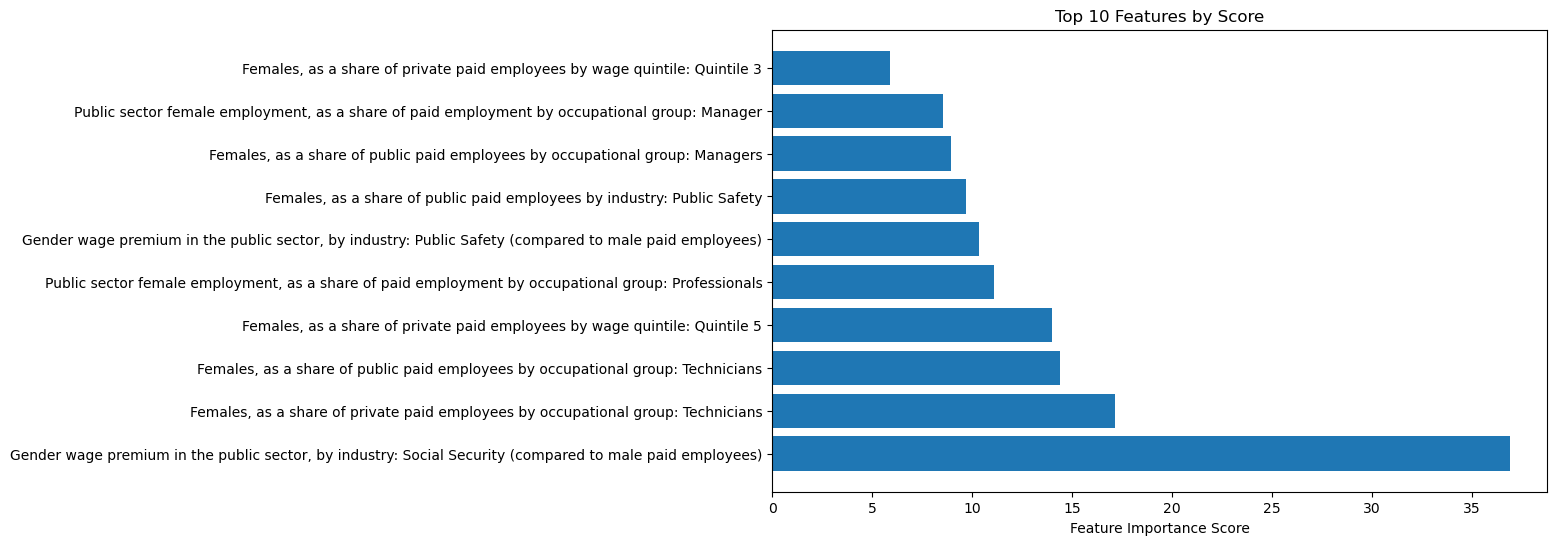

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

# Select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform both training and testing data
X_test_selected = selector.transform(X_test)

# Apply polynomial transformation
poly = PolynomialFeatures(degree=1, include_bias=False) # Create polynomial features with degree 1 (linear features only)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train_selected)

# Transform the testing data
X_test_poly = poly.transform(X_test_selected)

# Graph the top 10 features and their scores ascending
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
importances = selector.scores_
indices = np.argsort(importances)[::-1]
features = X.columns[indices][:10]
plt.figure(figsize=(10, 6))
plt.title("Top 10 Features by Score")
plt.barh(range(len(features)), importances[indices][:10], align="center")
plt.yticks(range(len(features)), features)
plt.xlabel("Feature Importance Score")
plt.show()

In [ ]:
# list of features selected and their scores
selected_features = pd.DataFrame({'Feature': features, 'Score': importances[indices][:10]})
selected_features = selected_features.sort_values(by='Score', ascending=False)
print(selected_features)



                                             Feature      Score
0  Gender wage premium in the public sector, by i...  36.934485
1  Females, as a share of private paid employees ...  17.155704
2  Females, as a share of public paid employees b...  14.418278
3  Females, as a share of private paid employees ...  14.013160
4  Public sector female employment, as a share of...  11.108742
5  Gender wage premium in the public sector, by i...  10.350817
6  Females, as a share of public paid employees b...   9.704666
7  Females, as a share of public paid employees b...   8.929974
8  Public sector female employment, as a share of...   8.566777
9  Females, as a share of private paid employees ...   5.879146


## Model training

### Subtask:
Train a Lasso and a RandomForestRegressor model using pipelines.


**Reasoning**:
Create and train Lasso and RandomForestRegressor models using pipelines.



In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Create pipelines
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()), #zscore
    ('lasso', Lasso())  # Experiment with different alpha values
])


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso
param_grid_lasso = {'lasso__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# Create GridSearchCV object for Lasso
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, scoring='neg_mean_squared_error', cv=5, verbose=4)

# Fit the GridSearchCV object to the training data
grid_search_lasso.fit(X_train_poly, y_train)

# Get the best alpha value
best_alpha = grid_search_lasso.best_params_['lasso__alpha']

# Update the lasso_pipeline with the best alpha
lasso_pipeline.set_params(lasso__alpha=best_alpha)

print(f"Best alpha for Lasso: {best_alpha}")


rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(max_depth=10, random_state=42)) # Experiment with n_estimators and max_depth
])

# Define the parameter grid for Random Forest
param_grid_rf = {'rf__n_estimators': [50, 100, 200, 250, 300]}

# Create GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring='neg_mean_squared_error', cv=5, verbose=4)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_poly, y_train)

# Get the best n_estimators value
best_n_estimators = grid_search_rf.best_params_['rf__n_estimators']

# Update the rf_pipeline with the best n_estimators
rf_pipeline.set_params(rf__n_estimators=best_n_estimators)

print(f"Best n_estimators for Random Forest: {best_n_estimators}")

# Train the pipelines
lasso_pipeline.fit(X_train_poly, y_train)
rf_pipeline.fit(X_train_poly, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............lasso__alpha=1e-05;, score=-0.002 total time=   0.0s
[CV 2/5] END ...............lasso__alpha=1e-05;, score=-0.003 total time=   0.0s
[CV 3/5] END ...............lasso__alpha=1e-05;, score=-0.006 total time=   0.0s
[CV 4/5] END ...............lasso__alpha=1e-05;, score=-0.002 total time=   0.0s
[CV 5/5] END ...............lasso__alpha=1e-05;, score=-0.003 total time=   0.0s
[CV 1/5] END ..............lasso__alpha=0.0001;, score=-0.002 total time=   0.0s
[CV 2/5] END ..............lasso__alpha=0.0001;, score=-0.003 total time=   0.0s
[CV 3/5] END ..............lasso__alpha=0.0001;, score=-0.005 total time=   0.0s
[CV 4/5] END ..............lasso__alpha=0.0001;, score=-0.002 total time=   0.0s
[CV 5/5] END ..............lasso__alpha=0.0001;, score=-0.003 total time=   0.0s
[CV 1/5] END ...............lasso__alpha=0.001;, score=-0.002 total time=   0.0s
[CV 2/5] END ...............lasso__alpha=0.001;, 

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=10, n_estimators=50,
                                       random_state=42))])

## Model evaluation

### Subtask:
Evaluate the trained Lasso and Random Forest models and compare their performance.


**Reasoning**:
Evaluate the trained Lasso and Random Forest models using the test set and calculate the R-squared, MSE, and MAE for both models. Then compare their performance based on these metrics.



In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred_lasso = lasso_pipeline.predict(X_test_poly)
y_pred_rf = rf_pipeline.predict(X_test_poly)

# Calculate evaluation metrics for Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Calculate evaluation metrics for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics
print("Lasso Regression Metrics:")
print(f"R-squared: {r2_lasso}")
print(f"MSE: {mse_lasso}")
print(f"MAE: {mae_lasso}")

print("\nRandom Forest Regression Metrics:")
print(f"R-squared: {r2_rf}")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")

# Compare the models
print("\nModel Comparison:")
if r2_lasso > r2_rf:
    print("Lasso Regression performs better based on R-squared.")
elif r2_rf > r2_lasso:
    print("Random Forest Regression performs better based on R-squared.")
else:
    print("Both models have the same R-squared.")

if mse_lasso < mse_rf:
    print("Lasso Regression performs better based on MSE.")
elif mse_rf < mse_lasso:
    print("Random Forest Regression performs better based on MSE.")
else:
    print("Both models have the same MSE.")

if mae_lasso < mae_rf:
    print("Lasso Regression performs better based on MAE.")
elif mae_rf < mae_lasso:
    print("Random Forest Regression performs better based on MAE.")
else:
    print("Both models have the same MAE.")

Lasso Regression Metrics:
R-squared: 0.8747843579194653
MSE: 0.0011986364913906286
MAE: 0.028326425364884108

Random Forest Regression Metrics:
R-squared: 0.7748434569700065
MSE: 0.002155328553740402
MAE: 0.034806617501079676

Model Comparison:
Lasso Regression performs better based on R-squared.
Lasso Regression performs better based on MSE.
Lasso Regression performs better based on MAE.
